<a href="https://colab.research.google.com/github/JUNGEUNAH/HG_MLDL/blob/main/01_%EB%82%98%EC%9D%98_%EC%B2%AB_%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **scikit-learn**

### **KNeighborsClassifier()** <br/>
k-최근접 이웃 분류 모델을 만드는 사이킷런 클래스 <br/>
<br/>

### **fit(fish_data, fish_target)** : 사이킷런 모델을 훈련할 때 사용 <br/>
매개 변수로 특성 데이터와 정답 데이터 2개 전달 받음 <br/>

### **predict(fish_data)** : 사이킷런 모델을 훈련하고 예측할 때 사용 <br/>
매개 변수로 특성 데이터 1개만 전달 받음 <br/>

### **score(fish_data, fish_target)** : 훈련된 사이킷런 모델 성능 측정할 때 사용 <br/>
매개 변수로 특성 데이터와 정답 데이터 2개 전달 받음 <br/>
predict() 메서드로 예측을 수행한 다음, 분류모델일 경우 정답과 비교하여 올바르게 예측한 개수의 비율을 반환함



---


**인공지능**은 사람처럼 학습하고 추론할 수 있는 지능을 가진 컴퓨터 시스템을 만드는 기술<br/>
**머신러닝**은 규칙을 일일이 프로그래밍하지 않아도 자동으로 데이터에서 규칙을 학습하는 알고리즘을 연구하는 분야<br/>
**딥러닝**은 머신러닝 알고리즘 중에 인공 신경망을 기반으로 한 방법들을 통칭하는 말<br/>





# 생선 분류 문제

머신러닝에서 여러 개의 종류 혹은 클래스(class) 중 하나를 구별해 내는 문제를 분류(classifiaction)라고 부릅니다. <br/>

특히, 2개의 클래스 중 하나를 고르는 문제를 이진 분류(binary classifiaction)라고 합니다. <br/>

데이터: https://www.kaggle.com/datasets/aungpyaeap/fish-market

### 도미 데이터 준비하기

In [98]:
# 도미의 길이
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

# 도미의무게
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

**feature(특성)**은 데이터의 특징<br/>

<br/>

**import**: 따로 만들어둔 파이썬 패키지(=클래스와 함수의 묶음)를 사용하기 위해 불러오는 명령<br/>

**matplotlib**: 파이썬에서 과학계산용 그래프를 그리는 대표적인 패키지(=클래스와 함수의 묶음)<br/>

**scatter plot(산점도)**: x,y축으로 이뤄진 좌표계에 두 변수(x,y)의 관계를 표현하는 방법<br/>

-> matplotlib 패키지를 import하고 산점도를 그리는 scatter()함수를 사용해서 그림



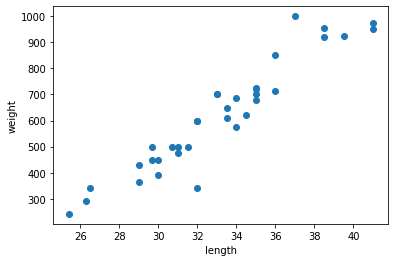

In [99]:
import matplotlib.pyplot as plt   # matplotlib의 pyplot함수를 plt로 줄여서 사용

plt.scatter(bream_length, bream_weight)
plt.xlabel('length')   # x축의 이름을 화면에 표시 _ x축은 길이
plt.ylabel('weight')  # y축의 이름을 화면에 표시 _ y축은 무게
plt.show()    # 준비된 그래프를 화면에 출력

In [100]:
# 산점도 그래프가 일직선에 가까운 형태로 나타나는 경우를 선형(linear)적이라고 함

### 빙어 데이터 준비하기

In [101]:
# 빙어의 길이
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# 빙어의 무게
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

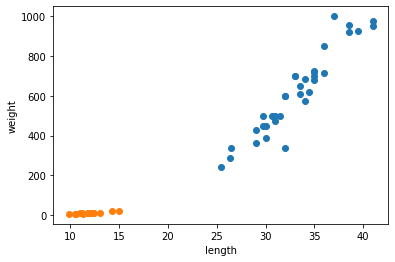

In [102]:
# 2개의 산점도를 한 그래프로 그리려면 scatter()함수를 연달아 사용하면 됨

plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [103]:
# 빙어도 도미와 비슷하게 길이와 무게가 비례하지만, 길이가 늘어나더라도 무게가 많이 늘지 않습니다. 
# 빙어의 산점도도 선형적이지만 무게가 길이의 영향을 덜 받는다고 볼 수 있습니다. 

# 첫번째 머신러닝 프로그램: k-최근접 이웃 알고리즘

### 도미 데이터와 빙어 데이터를 합쳐서 하나의 생선 데이터 준비하기

두 리스트를 더해서 하나의 리스트로 만들어 주기

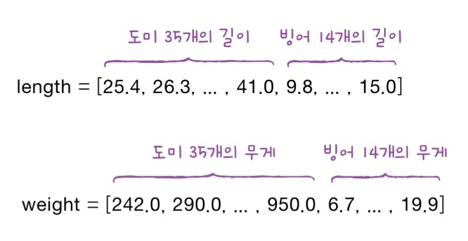<br/>
이 책에서 사용하는 머신러닝 패키지는 사이킷런이며,<br/>

**사이킷런 패키지를 사용하려면 각 특성(feature)의 리스트를 세로 방향으로 늘어뜨린 2차원 리스트**를 만들어야 합니다.<br/>

(첫 번째 생선의 길이 25.4cm와 무게 242.0g가 하나의 리스트를 구성하고, 이런 리스트가 모여 전체 리스트를 만듦)<br/>
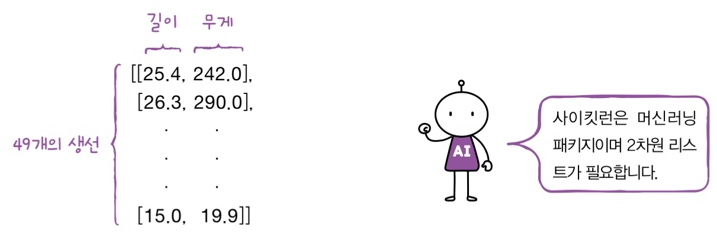

2차원 리스트를 만드는 가장 쉬운 방법은 파이썬의 zip()함수와 리스트 내포 구문을 사용하는 것이다. 

In [104]:
# 생선의 길이
length = bream_length + smelt_length

# 생선의 무게 
weight = bream_weight + smelt_weight

In [105]:
# 생선 데이터
fish_data = [[l,w] for l, w in zip(length,weight)]    # zip() - 나열된 리스트 각각에서 하나씩 원소를 꺼내 반환
                                                      # for문은 zip() 함수로 length와 weight 리스트에서 원소를 하나씩 꺼내어 l과 w에 할당
                                                      # [l,w]가 하나의 원소로 구성된 리스트가 만들어 짐
print(fish_data)

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


### 정답 데이터 준비하기

머신러닝 알고리즘이 생선의 길이와 무게를 보고 도미와 빙어를 구분하는 규칙을 찾게하려면, <br/>
적어도 어떤 생선이 도미인지 빙어인지 알려줘야 합니다. <br/>

(스무고개를 하는데 고개마다 답을 알려주지 않는다면,  정답을 맞힐 수 없는 것과 같음)<br/>
 <br/>
컴퓨터 프로그램은 문자를 직접 이해하지 못하기 때문에 <br/>
도미와 빙어를 숫자 **1과 0**으로 표현. <br/>
<br/>
머신러닝에서 2개를 구분하는 경우,  <br/>
**찾으려는 대상을 1**로 놓고 **그 외에는 0**으로. <br/>

In [106]:
fish_target = [1]*35 + [0]*14   # 앞서 도미와 빙어를 순서대로 나열했기 때문에 
                                # 정답 리스트는 1이 35번 등장하고나서 0이 14번 등장하면 됨.
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### 머신러닝 모델

In [107]:
# 패키지나 모듈 전체를 임포트하지 않고 특정 클래스만 임포트하려면, from ~ import 구문을 사용
from sklearn.neighbors import KNeighborsClassifier 

# import sklearn                                    이런식으로 
# model = sklearn.neighbors.KNeighborsClassifier()  클래스 이름을 길게 사용하지 않아도 됨

kn=KNeighborsClassifier() # KNeighborClassifier()는 k-최근접 이웃 알고리즘을 구현한 클래스
                          # kn은 KNeighborClassifier 클래스를 구현한 객체

### 학습 

k-최근접 이웃 알고리즘을 구현한 객체 = 모델 에 fish_data와 fish_target을 전달하여 <br/>
도미를 찾기 위한 기준을 학습 시킴

In [108]:
kn.fit(fish_data, fish_target)  # fit()는 주어진 데이터로 알고리즘을 훈련한다.

KNeighborsClassifier()

### 성능 평가 score()

predict() 메서드로 예측을 수행한 다음, 분류모델일 경우 정답과 비교하여 올바르게 예측한 개수의 비율을 반환함

In [109]:
kn.score(fish_data,fish_target) # score()는 얼마나 잘 훈련(모델에 데이터를 전달하여 규칙을 학습하는 과정)되었는지 평가

1.0

### k-최근접 이웃 알고리즘

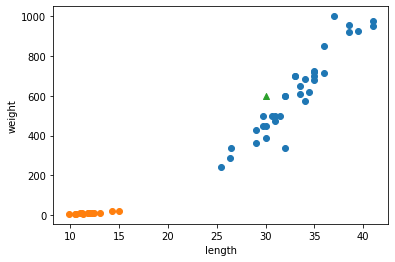

In [110]:
plt.scatter(bream_length, bream_weight)
plt.scatter(smelt_length, smelt_weight)
plt.scatter(30, 600, marker='^')  # 새로운 데이터
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [111]:
kn.predict([[30,600]])		# predict()는 새로운 데이터의 정답을 예측. 리스트의 리스트를 전달받아야 하므로 리스트로 2번 감싸주기
# array([1]) : 도미(1)라고 판단.

array([1])

**k-최근접 이웃 알고리즘**을 위해 해야할 일은 데이터를 모두 가지고 있는 것이 전부 <br/>

새로운 데이터에 대해 예측: 가장 가까운 직선거리에 어떤 데이터가 있는지 살피기 <br/>

-> 데이터가 아주 많은 경우에 메모리가 많이 필요하고 직선거리를 계산하는데도 많은 시간이 필요

In [112]:
print(kn._fit_X)    # KNeighborsClassfier 클래스도 _fit_X 속성에 우리가 전달한 fish_data를 모두 가지고 있음

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [113]:
print(kn._y)        # KNeighborsClassfier 클래스도 _y 속성에 우가 전달한 fish_data를 모두 가지고 있음

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [114]:
# 참고 데이터를 49개로 한 kn49모델

kn49 = KNeighborsClassifier(n_neighbors=49) # n_neighbors로 참고할 데이터 개수 설정

KNeighborsClassifier() 매개 변수 <br/>


n_neighbors: 참고할 데이터 개수 설정 (기본값 5) <br/>

p: 거리를 재는 방법 (기본값 2).<br/>
    맨해튼 거리(1), 유클리디안 거리(2) <br/>

n_jobs: 사용할 CPU 코어 지정 (기본값 1) <br/>
    모든 CPU 코어 사용(-1) 
    계산 속도를 높일 수 있지만 fit()메서드에는 영향 없음

In [115]:
kn49.fit(fish_data, fish_target)    # fish_data 49개 중에 도미가 35로 다수를 차지하기때문에 어떤 데이터를 넣어도 무조건 도미로 예측 
kn49.score(fish_data, fish_target)  # 무조건 도미로 예측하니까 도미만 올바르게 맞히기 때문에 35/49의 정확도를 가짐

0.7142857142857143

In [116]:
print(35/49)

0.7142857142857143
